In [1]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
food_data = pd.read_csv("food.csv")

In [3]:
food_data.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [4]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [5]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
food_data1=food_data.drop(['Category','Description','Data.Household Weights.1st Household Weight'
                          ,'Data.Household Weights.2nd Household Weight'],1)## Droping string features
#food_data1 = food_data1[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein','Data.Sugar Total','Data.Water',
#                         'Data.Fat.Total Lipid',
#          'Data.Major Minerals.Calcium',
#          'Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin B6']]
food_data1 = food_data1[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
                         'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']]

standard_scaler = StandardScaler()
food_scaled = standard_scaler.fit_transform(food_data1)

In [6]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(food_scaled)

PCA(random_state=42, svd_solver='randomized')

In [7]:
pca.components_

array([[ 0.23260392,  0.09456624,  0.71516016,  0.13937102,  0.63699091,
        -0.01780135],
       [-0.59676477,  0.54543951, -0.10402187,  0.56268448,  0.13172556,
         0.03976871],
       [ 0.16926591,  0.24556759,  0.01341143, -0.10811267, -0.06322744,
         0.94613936],
       [ 0.62564226,  0.36861241,  0.08292019,  0.44719238, -0.47942472,
        -0.18971505],
       [ 0.04113097,  0.70522525, -0.05799288, -0.65131858,  0.08067277,
        -0.25860865],
       [-0.40987349, -0.00563657,  0.68359827, -0.16756081, -0.58011817,
         0.00718594]])

In [8]:
pca.explained_variance_ratio_

array([0.3170102 , 0.25255769, 0.17110328, 0.13877339, 0.11967752,
       0.00087792])

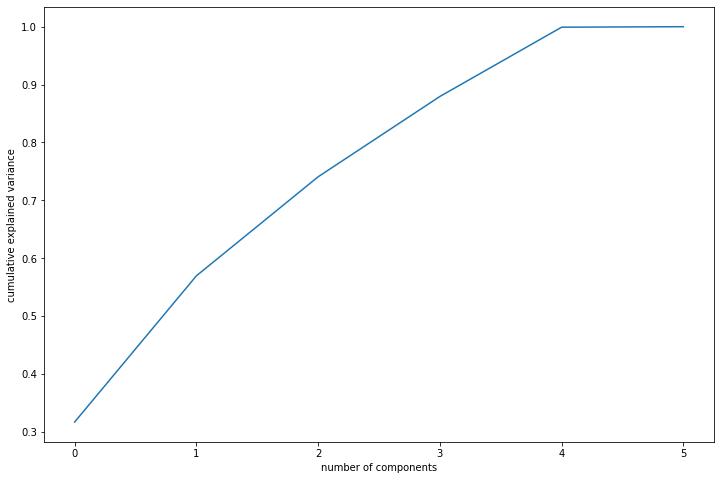

In [9]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
colnames = list(food_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3]}) #'PC5':pca.components_[4],'PC6':pca.components_[5]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,Data.Carbohydrate,0.232604,-0.596765,0.169266,0.625642
1,Data.Cholesterol,0.094566,0.545440,0.245568,0.368612
2,Data.Kilocalories,0.715160,-0.104022,0.013411,0.082920
3,Data.Protein,0.139371,0.562684,-0.108113,0.447192
4,Data.Fat.Total Lipid,0.636991,0.131726,-0.063227,-0.479425
5,Data.Vitamins.Vitamin A - IU,-0.017801,0.039769,0.946139,-0.189715


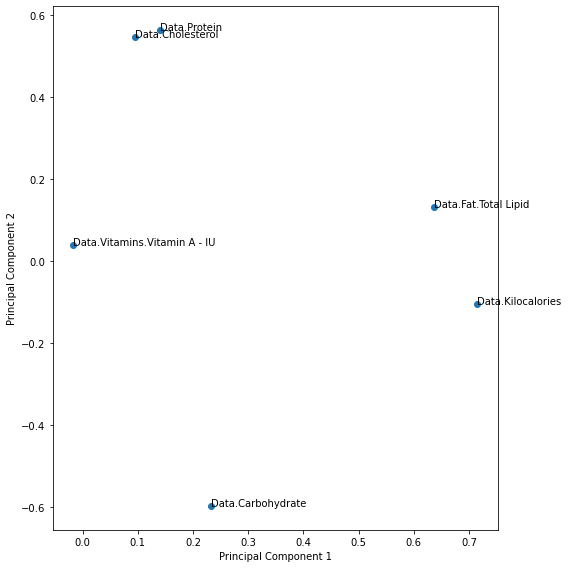

In [11]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [12]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [13]:
df_pca = pca_final.fit_transform(food_scaled)
df_pca.shape

(7413, 4)

In [14]:
pc = np.transpose(df_pca)

In [15]:
corrmat = np.corrcoef(pc)

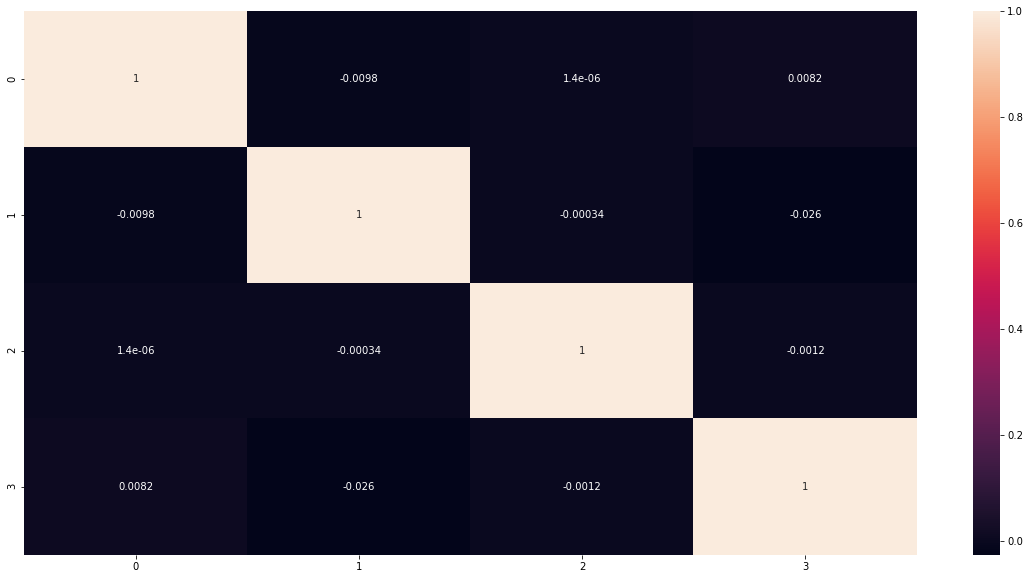

In [16]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [17]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]}) #,'PC5':pc[4],'PC6':pc[5]})

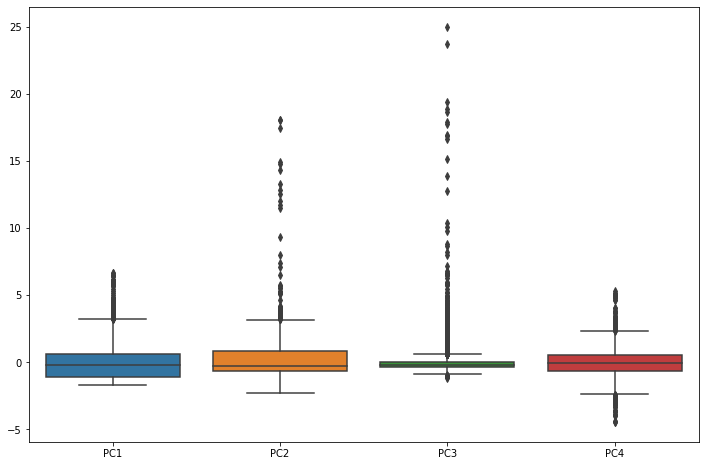

In [18]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [19]:
pcs_df2.shape

(7413, 4)

In [20]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,4.710362,0.565876,0.507349,-2.834771
1,4.713731,0.588804,0.515541,-2.840051
2,6.119375,0.659945,0.675781,-3.299628
3,1.384971,1.005142,-0.216223,-0.080605
4,1.547258,1.182408,-0.117703,0.016443


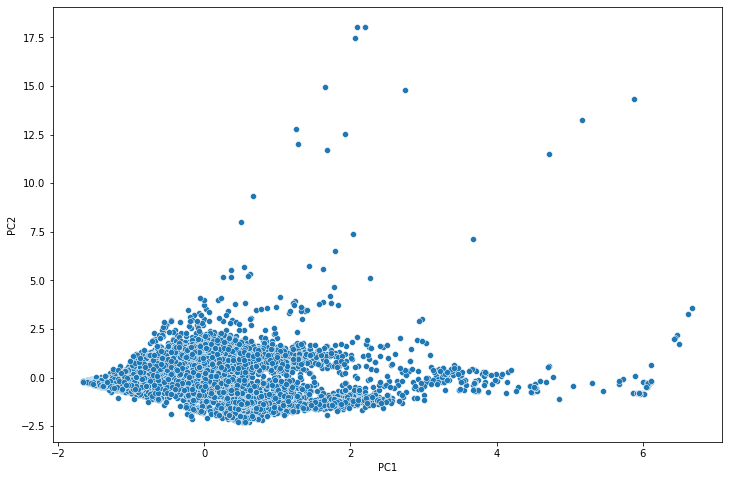

In [21]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     7413 non-null   float64
 1   PC2     7413 non-null   float64
 2   PC3     7413 non-null   float64
 3   PC4     7413 non-null   float64
dtypes: float64(4)
memory usage: 231.8 KB


In [24]:
hopkins(pcs_df2)

0.9881691150326136

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [25]:
pcs_df2.shape

(7413, 4)

In [26]:
dat3_1 = pcs_df2

In [27]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

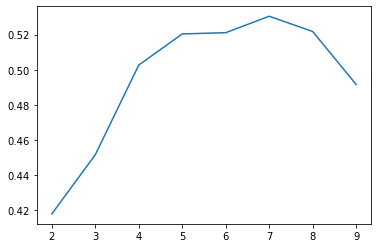

In [28]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

This is the silhouette analysis to determine optimal k number of clusters

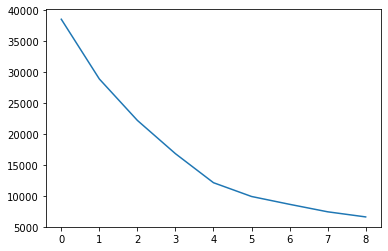

In [29]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

This is the elbow curve to determine optimal k number of clusters. The elbow is at 4, hence we shall choose 4 clusters.

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4173653649129548
For n_clusters=3, the silhouette score is 0.451609551907282
For n_clusters=4, the silhouette score is 0.5025138812409785
For n_clusters=5, the silhouette score is 0.5203434342033134
For n_clusters=6, the silhouette score is 0.5210579392895296
For n_clusters=7, the silhouette score is 0.5306708828571626
For n_clusters=8, the silhouette score is 0.5216103979232315


In [31]:
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [32]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']#,'PC5','PC6','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,ClusterID
0,4.710362,0.565876,0.507349,-2.834771,3
1,4.713731,0.588804,0.515541,-2.840051,3
2,6.119375,0.659945,0.675781,-3.299628,3
3,1.384971,1.005142,-0.216223,-0.080605,0
4,1.547258,1.182408,-0.117703,0.016443,0
...,...,...,...,...,...
7408,-1.020813,0.854492,-0.316072,0.115926,0
7409,0.994725,1.055392,-0.298577,-0.287221,0
7410,-0.695197,1.181860,-0.367042,0.576177,0
7411,-0.900311,0.790942,-0.291121,0.115845,0


In [33]:
dat_km['ClusterID'].value_counts()

2    2950
0    2425
1    1732
3     306
Name: ClusterID, dtype: int64

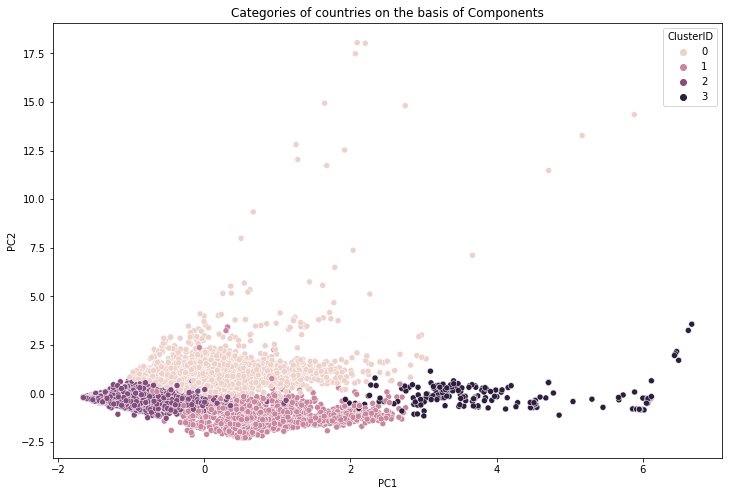

In [34]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [35]:
dat5=pd.merge(food_data,dat_km, left_index=True,right_index=True)
dat5.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,PC1,PC2,PC3,PC4,ClusterID
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,0.17,0.003,0.0,2.32,7.0,4.710362,0.565876,0.507349,-2.834771,3
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,0.13,0.003,0.0,2.32,7.0,4.713731,0.588804,0.515541,-2.840051,3
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,0.01,0.001,0.0,2.80,8.6,6.119375,0.659945,0.675781,-3.299628,3
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,1.22,0.166,0.0,0.25,2.4,1.384971,1.005142,-0.216223,-0.080605,0
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,1.26,0.065,0.0,0.26,2.5,1.547258,1.182408,-0.117703,0.016443,0


In [36]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4'],axis=1)#,'PC5','PC6'],axis=1)
dat6.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,ClusterID
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0,3
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0,3
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6,3
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4,0
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5,0


In [37]:
dat6.shape

(7413, 49)

'Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein','Data.Sugar Total','Data.Water',
                         'Data.Fat.Total Lipid',
          'Data.Major Minerals.Calcium',
          'Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin B6'

[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
                         'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']]

In [38]:
Cluster_Data_Carbohydrate=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Carbohydrate'].mean())
Cluster_Data_Cholesterol=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Cholesterol'].mean())
Cluster_Data_Kilocalories=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Kilocalories'].mean())
Cluster_Data_Protein=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Protein'].mean())
#Cluster_Data_SugarTotal=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Sugar Total']).mean()
#Cluster_Data_Water=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Water']).mean()
Cluster_Data_Fat_TotalLipid=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Fat.Total Lipid']).mean()
#Cluster_Data_MajorMinerals_Calcium=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Major Minerals.Calcium'].mean())
Cluster_Data_Vitamins_VitaminA=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Vitamins.Vitamin A - IU'].mean())
#Cluster_Data_Vitamins_VitaminB6=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Vitamins.Vitamin B6'].mean())

In [39]:
df = pd.concat([Cluster_Data_Carbohydrate,Cluster_Data_Cholesterol,Cluster_Data_Kilocalories,Cluster_Data_Protein,
                Cluster_Data_Fat_TotalLipid,Cluster_Data_Vitamins_VitaminA], axis=1)

In [40]:
df.columns = ['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
            'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']
df

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,3.113320,98.813608,215.211959,22.739563,1.5,335.148454
1,66.026345,7.654157,378.554273,8.227113,NaN,1216.677252
2,12.596593,4.366102,79.146102,2.894003,NaN,854.878644
3,7.933497,31.790850,710.075163,7.201144,NaN,810.689542


In [41]:
cluster0=dat6.loc[dat6['ClusterID'] == 0]


In [42]:
cluster0['Category'].value_counts()

BEEF                                               452
PORK                                               284
LAMB                                               191
CHICKEN                                            161
TURKEY                                             121
                                                  ... 
TURKEY PATTIES                                       1
PARMESAN CHS TOPPING                                 1
MORNINGSTAR FARMS BRKFST PATTIE MADE W/ ORG SOY      1
LOMA LINDA BIG FRANKS                                1
MORNINGSTAR FARMS ORIGINAL CHIK'N TENDERS            1
Name: Category, Length: 317, dtype: int64

To see all of the data, use value_counts().index.tolist()

In [43]:
cluster0['Category'].value_counts().index.tolist()

['BEEF',
 'PORK',
 'LAMB',
 'CHICKEN',
 'TURKEY',
 'VEAL',
 'No Category',
 'FAST FOODS',
 'CHEESE',
 'GAME MEAT',
 'OSCAR MAYER',
 'BF',
 "MCDONALD'S",
 'SALMON',
 'FISH',
 'EGG',
 'POPEYES',
 'KENTUCKY FRIED CHICK',
 'OSTRICH',
 'LOUIS RICH',
 'USDA COMMODITY',
 'TUNA',
 'EMU',
 'DUCK',
 'BURGER KING',
 'MACKEREL',
 'CRAB',
 "WENDY'S",
 'BOLOGNA',
 'BABYFOOD',
 'USDA CMDTY',
 'FRANKFURTER',
 'LUNCHEON MEAT',
 'TROUT',
 'HERRING',
 'SAUSAGE',
 'COD',
 'SOYBEANS',
 'CATFISH',
 'CARIBOU',
 'SEAL',
 'GOOSE',
 'HAM',
 'TOFU',
 'CARL BUDDIG',
 'HORMEL ALWAYS TENDER',
 'PHEASANT',
 'SOY FLR',
 'Fish',
 'SALAMI',
 'BASS',
 'CRAYFISH',
 'MILK',
 'TACO BELL',
 'SEA LION',
 'QUAIL',
 'PIKE',
 'SOY PROT ISOLATE',
 'POLLOCK',
 'SHRIMP',
 'CHEESE FD',
 'SOUP',
 'HALIBUT',
 'CLAM',
 'SMELT',
 'WHITEFISH',
 'SABLEFISH',
 'CHICKEN BREAST TENDERS',
 'PORK SAUSAGE',
 'SCALLOP',
 'STURGEON',
 'Elk',
 'POULTRY',
 'TURKEY SAUSAGE',
 'WALRUS',
 'HADDOCK',
 'CHEESE SPRD',
 'SQUAB',
 'SMOKED LINK SAUSAGE',
 

In [44]:
food_data['Category'].value_counts()

BEEF                      457
PORK                      304
CEREALS RTE               291
BABYFOOD                  221
No Category               198
                         ... 
CHILI WITH BEANS            1
CHERVIL                     1
KRAFT                       1
CORN CAKES                  1
CAMPBELL'S CHNKY SOUPS      1
Name: Category, Length: 1183, dtype: int64

We can use Category to observe the food catgories with highest count inside the cluster. However, we cannot use the count to rank the categories in the cluster as different categories have different total count, such has BEEF(457) and SNAIL(1).

In addition, there are a few Category where different types of food belong in the same category, such as FAST FOOD having ice cream as well as burger. Thus using Description instead to identify the food in each cluster is more specific and accurate.

In [45]:
cluster0['Description'].value_counts()

WORTHINGTON DINNER RST,FRZ,UNPREP                              2
PORK,CURED,HAM & H2O PRDCT,SLCE,BNE-IN,LN & FAT,HTD,PAN-BRL    1
Elk, free range, ground, cooked patties (Shoshone Bannock)     1
GAME MEAT,BISON,SHLDR CLOD,LN,0"FAT,RAW                        1
PORK,CURED,HAM W/ NAT JUICES,SHANK,BONE-IN,LN,HTD,RSTD         1
                                                              ..
LOUIS RICH,TURKEY SALAMI COTTO                                 1
LAMB,AUS,IMP,FRSH,SHLDR,BLADE,LN,1/8"FAT,CKD,BRLD              1
PORK,FRSH,VAR MEATS&BY-PRODUCTS,TONGUE,CKD,BRSD                1
PEANUT FLOUR,DEFATTED                                          1
CHICKEN,WING,FRZ,GLAZED,BBQ FLAV,HTD (CONVENTIONAL OVEN)       1
Name: Description, Length: 2424, dtype: int64

In [46]:
cluster0['Description'].value_counts().index.tolist()

['WORTHINGTON DINNER RST,FRZ,UNPREP',
 'PORK,CURED,HAM & H2O PRDCT,SLCE,BNE-IN,LN & FAT,HTD,PAN-BRL',
 'Elk, free range, ground, cooked patties (Shoshone Bannock)',
 'GAME MEAT,BISON,SHLDR CLOD,LN,0"FAT,RAW',
 'PORK,CURED,HAM W/ NAT JUICES,SHANK,BONE-IN,LN,HTD,RSTD',
 "MORNINGSTAR FARMS AMERICA'S ORIGINAL VEGGIE DOG,FRZ,UNPREP",
 'OSCAR MAYER,LIVER CHS,PORK FAT WRAPPED',
 'OCTOPUS,COMMON,CKD,MOIST HEAT',
 'BEEF,RIB,SML END (RIBS 10-12),LN,0"FAT,SEL,CKD,BRLD',
 'PORK,CURED,HAM -- H2O ADDED,SHANK,BONE-IN,LN & FAT,UNHTD',
 'PORK,FRSH,LOIN,WHL,LN&FAT,RAW',
 'BEEF,RND,BTTM RND,LN&FAT,1/8"FAT,ALL GRDS,CKD,RSTD',
 'LAMB,DOM,LEG,SHANK HALF,LN&FAT,1/4"FAT,CHOIC,CKD,RSTD',
 'POLLOCK,WALLEYE,CKD,DRY HEAT',
 'VEAL,SIRLOIN,LN&FAT,CKD,BRSD',
 'LAMB,VAR MEATS&BY-PRODUCTS,LIVER,RAW',
 'FAST FOODS,ENG MUFFIN,W/EGG,CHS,&SAUSAGE',
 'CHEESE,ROMANO',
 'PORK  FRSH  LOIN  TENDERLOIN   LN ONLY  RAW',
 'TURKEY,YOUNG HEN,MEAT ONLY,CKD,RSTD',
 'CHICKEN,BROILERS OR FRYERS,WING,MEAT&SKN,CKD,FRIED,FLR',
 'VEAL,LOIN

Cluster 0:
- Mainly meat, fast food, fish
- cluster with highest protein and cholesterol and total fat lipid and lowest carbohydrate
- lowest vitamin A content
- Food cluster good for protein intake, for pre/post workout for example. 

In [47]:
cluster1=dat6.loc[dat6['ClusterID'] ==1]

In [48]:
cluster1['Description'].value_counts()

POPCORN,OIL-POPPED,LOFAT                                        2
PUDDINGS,LEMON,DRY MIX,INST                                     1
ONION POWDER                                                    1
PUDDINGS,CHOC FLAVOR,LO CAL,INST,DRY MIX                        1
COFFEECAKE,CINN W/CRUMB TOPPING,COMMLY PREP,UNENR               1
                                                               ..
TRITICALE FLR,WHOLE-GRAIN                                       1
CANDIES,MASTERFOODS USA,COCOAVIA BLUEBERRY & ALMOND CHOC BAR    1
CANDIES,ALMOND JOY BITES                                        1
CEREALS,KASHI GO LN HOT CRL,HEARTY HONEY & CINN,DRY             1
CEREALS,CORN GRITS,WHITE,REG & QUICK,UNENR,DRY                  1
Name: Description, Length: 1731, dtype: int64

In [49]:
cluster1['Description'].value_counts().index.tolist()

['POPCORN,OIL-POPPED,LOFAT',
 'PUDDINGS,LEMON,DRY MIX,INST',
 'ONION POWDER',
 'PUDDINGS,CHOC FLAVOR,LO CAL,INST,DRY MIX',
 'COFFEECAKE,CINN W/CRUMB TOPPING,COMMLY PREP,UNENR',
 'PIZZA,MEAT & VEG TOPPING,REG CRUST,FRZ,CKD',
 'CERLS,QUAKER,INST GRIT PRDCT W/ RDEYE GRVY&IMITN HAM BIT,DRY',
 'COFFEE SUB,RSTD GRAIN BEV,NAT TOUCH KAFFREE ROMA,PDR',
 'GENERAL MILLS,BETTY CROCKER SUPERMOIST YEL CAKE MIX,DRY',
 'GEORGE WESTON BAKERIES,THOMAS ENG MUFFINS',
 'BREAD,CORNBREAD,PREP FROM RECIPE,MADE W/LOFAT (2%) MILK',
 'ARCHWAY Home Style Cookies, Molasses',
 'CANDIES,JELLYBEANS',
 'CANDIES,MARSHMALLOWS',
 'PEANUT BUTTER,SMOOTH,RED FAT',
 'MILLET,PUFFED',
 'BABYFOOD,CRL,OATMEAL,W/HONEY,DRY',
 'BABYFOOD,CRL,MXD,W/BANANAS,DRY',
 'PEPPERIDGE FARM CRUSTY ITALIAN BREAD,GARLIC',
 'CHEESE,GJETOST',
 'WAFFLE,BTTRMLK,FRZ,RTH,TSTD',
 'COOKIES,CHOC CHIP,REFR DOUGH,BKD',
 'MARGARINE-LIKE SPRD,RED CAL,40% FAT,STK,W/SALT',
 'CEREALS RTE,KASHI GOLEAN CRUNCH! BY KELLOGG',
 'GRAVY,CHICKEN,DRY',
 'TORTILLAS,RTB OR 

Cluster 1:
- Mainly consists of sugary food, pastry, cereals
- Highest in carbohydrate and vitamins. 
- Low in cholestrol
- This food cluster can be good for breakfast, due to light calorie and cholesterol intake but high carbohydrates for energy to start the day.

In [50]:
cluster2=dat6.loc[dat6['ClusterID'] ==2]

In [51]:
cluster2['Description'].value_counts()

CAMPBELL,CAMPBELL'S SEL MICROWAVEABLE BOWLS,HEA                 2
BABYFOOD,MEAT,BF,STR                                            2
POTATOES,BLD,CKD IN SKN,FLESH,W/SALT                            1
MARIE CALLENDER TKY W/GRY & DRSNG W/ MSHD POT,GRN BNS & CRAN    1
RICE,WHITE,W/PASTA,CKD                                          1
                                                               ..
SQUASH,WINTER,HUBBARD,RAW                                       1
ARTICHOKES,(GLOBE OR FRENCH),FRZ,UNPREP                         1
CEREALS,QUAKER,INST OATMEAL,APPLS & CINN,PREP W/ BOILING H2O    1
FIGS,CND,LT SYRUP PK,SOL&LIQUIDS                                1
BEANS,CRANBERRY (ROMAN),MATURE SEEDS,CKD,BLD,W/SALT             1
Name: Description, Length: 2948, dtype: int64

In [52]:
cluster2['Description'].value_counts().index.tolist()

["CAMPBELL,CAMPBELL'S SEL MICROWAVEABLE BOWLS,HEA",
 'BABYFOOD,MEAT,BF,STR',
 'POTATOES,BLD,CKD IN SKN,FLESH,W/SALT',
 'MARIE CALLENDER TKY W/GRY & DRSNG W/ MSHD POT,GRN BNS & CRAN',
 'RICE,WHITE,W/PASTA,CKD',
 'BEANS,SNAP,GRN,FRZ,ALL STYLES,MICROWAVED',
 'INF FOR,ME JOHN,ENFAM,LIPIL,LO IRON,READY TO FE,W/ ARA & DHA',
 "CAMPBELL'S CHUNKY SOUPS,CLASSIC CHICK NOODLE SOUP",
 "CAMPBELL,CAMPBELL'S SEL SOUP,ZESTY AZTECA MEATB",
 'CAMPBELL SOUP,PREGO PASTA,ORGNIC TOMATO & BASIL ITAL SAU,RTS',
 'TOMATO PRODUCTS,CND,PUREE,WO/SALT',
 'MILK,FILLED,FLUID,W/BLEND OF HYDR VEG OILS',
 'YAMBEAN (JICAMA),RAW',
 'LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,STRAIGHT PO4',
 'COFFEE SUB,CRL GRAIN BEV,PREP W/ H2O',
 'CAMPBELL SOUP COMPANY,PACE,CILANTRO CHUNKY SALSA',
 'SQUASH,SMMR,ZUCCHINI,INCL SKN,FRZ,CKD,BLD,DRND,WO/SALT',
 'CAMPBELL SOUP COMPANY,HEALTHY REQUEST TOMATO JUC',
 'SPLIT PEA SOUP,CND,RED NA,PREP W/ H2O OR READY-TO SERVE',
 'SALAD DRSNG,BACON&TOMATO',
 'LEMONADE,LO CAL,W/ASPRT,PDR,PREP W/H2O',
 "

Cluster 2:
- Consists of wide variety of food: Baby food, soup, vegetables, drinks etc.
- Lowest in cholesterol, calories and protein. Second highest in vitamins.

In [53]:
cluster3=dat6.loc[dat6['ClusterID'] ==3]

In [54]:
cluster3['Description'].value_counts()

BUTTER,WITHOUT SALT                                    1
FISH OIL,MENHADEN                                      1
OIL,VEG,SUNFLOWER,LINOLEIC (LESS THAN 60%)             1
PORK,ORIENTAL STYLE,DEHYD                              1
OIL,OLIVE,SALAD OR COOKING                             1
                                                      ..
PILINUTS-CANARYTREE,DRIED                              1
SUNFLOWER SD BUTTER,WO/SALT                            1
OIL,VEG,INDUSTRIAL,SOY,REFINED,FOR WOKS & LT FRYING    1
SALAD DRSNG,MAYO,IMITN,SOYBN WO/CHOL                   1
PATE,GOOSE LIVER,SMOKED,CND                            1
Name: Description, Length: 306, dtype: int64

In [55]:
cluster3['Description'].value_counts().index.tolist()

['BUTTER,WITHOUT SALT',
 'FISH OIL,MENHADEN',
 'OIL,VEG,SUNFLOWER,LINOLEIC (LESS THAN 60%)',
 'PORK,ORIENTAL STYLE,DEHYD',
 'OIL,OLIVE,SALAD OR COOKING',
 'OIL,INDUS,SOY (PART HYDR ) & SOY (WINTERIZED),POURABLE FRY',
 'MARGARINE,REG,HARD,SUNFLOWER&SOYBN (HYDR)&CTTNSD (HYDR)',
 'NUTS,PINE NUTS,DRIED',
 'SHORTENING FRYING HVY DUTY,SOYBN HYDR,LINOLEIC (LESS THAN 1%',
 'BUTTER OIL,ANHYDROUS',
 'SESAME BUTTER,TAHINI,KRNLS UNSPEC',
 'MARGARINE,REG,UNSPEC OILS,WO/ SALT',
 'VEGETABLE OIL,AVOCADO',
 'OIL,VEG,INDUS,PALM KERNEL,CONFECTION FAT',
 'AGUTUK,FISH W/ SHORTENING (ALASKA NATIVE)',
 'OIL,VEGETABLE,WALNUT',
 'PECANS,OIL RSTD,W/SALT',
 'FORMULATED,WHEAT-BASED,ALL FLAVORS XCPT MACADAMIA,WO/SALT',
 'VEGETABLE OIL-BUTTER SPRD,RED CAL',
 'OIL,VEG,NATREON CANOLA,HI STABILITY,NON TRANS,HI OLEIC (70%)',
 'SUNFLOWER SD KRNLS,DRY RSTD,W/SALT',
 'CHICKEN,BROILERS OR FRYERS,FAT,RAW',
 'OIL,WALRUS (ALASKA NATIVE)',
 'MARGARINE,VEG OIL SPRD,60% FAT,STK',
 'PECANS',
 'BUTTER,WHIPPED,WITH SALT',
 'ALMONDS

Cluster 3:
- Mainly consists of oil, sauce/dressing and nuts.
- Significantly high calorie content out of the other clusters
- Second highest in cholesterol.
- Due to its high calorie and cholesterol content, we should consume food within this cluster in moderation.